<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/timeseries_trying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement 3.4.3 (from versions: none)
ERROR: No matching distribution found for 3.4.3


In [39]:
dtf = pd.read_excel('/content/drive/MyDrive/Data/Veri-Seti.xlsx',
                 index_col='Date',
                 parse_dates=True
                )

In [40]:


dtf.head()

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.000,37.000,13.182,2.107,341244.126
2010-02-01,31172.000,37.000,13.273,2.074,351940.949
2010-03-01,51769.000,37.000,12.727,2.086,361307.320
2010-04-01,54946.000,37.000,12.012,2.009,373575.340
2010-05-01,59377.000,37.000,11.740,1.949,387708.051


In [41]:
dtf.tail()

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN


In [42]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2010-01-01 to 2023-06-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


In [43]:
dtf.dropna(inplace=True)

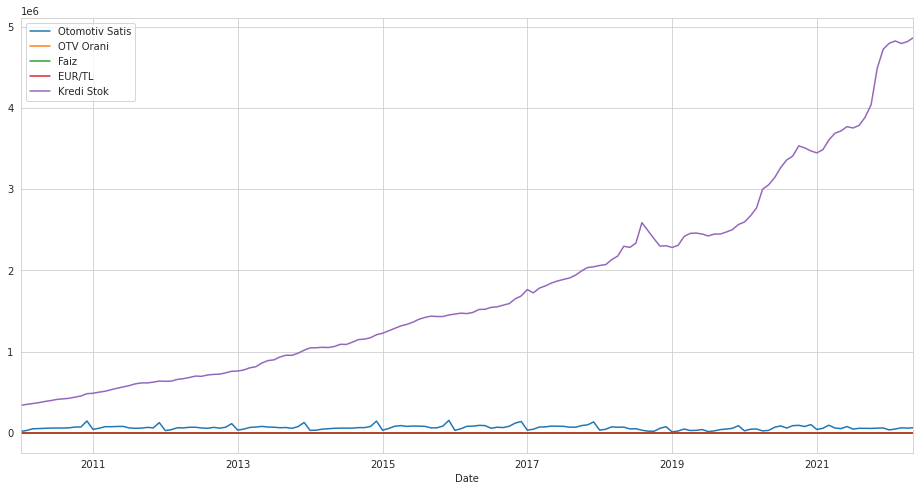

In [44]:
dtf.plot(figsize=(16,8));

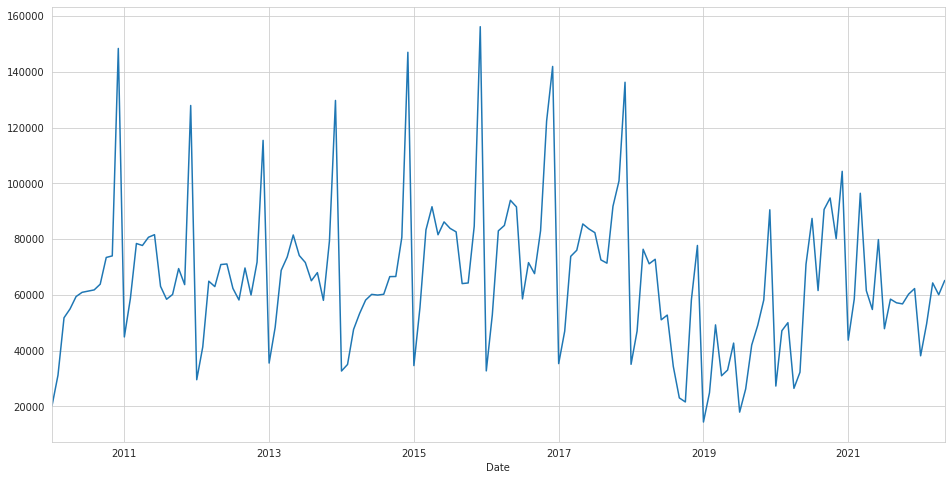

In [45]:
dtf["Otomotiv Satis"].plot(figsize=(16,8));

# Train Test

In [46]:
test_size = 12

In [47]:
test_ind = len(dtf)- test_size

In [48]:
train = dtf.iloc[:test_ind]
test = dtf.iloc[test_ind:]

In [49]:
X_train= train.drop("Otomotiv Satis",axis=1)
X_train

,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,
2010-01-01,37.000,13.182,2.107,341244.126
2010-02-01,37.000,13.273,2.074,351940.949
2010-03-01,37.000,12.727,2.086,361307.320
2010-04-01,37.000,12.012,2.009,373575.340
2010-05-01,37.000,11.740,1.949,387708.051
...,...,...,...,...
2021-01-01,50.000,19.040,9.024,3445966.108
2021-02-01,50.000,19.227,8.572,3485653.885
2021-03-01,50.000,19.358,9.108,3605919.171


In [50]:
y_train= train["Otomotiv Satis"]
y_train

Date
2010-01-01   20095.000
2010-02-01   31172.000
2010-03-01   51769.000
2010-04-01   54946.000
2010-05-01   59377.000
                ...   
2021-01-01   43728.000
2021-02-01   58504.000
2021-03-01   96428.000
2021-04-01   61488.000
2021-05-01   54734.000
Name: Otomotiv Satis, Length: 137, dtype: float64

In [51]:
X_test= test.drop("Otomotiv Satis",axis=1)
X_test

,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,
2021-06-01,50.000,22.032,10.390,3768865.877
2021-07-01,50.000,22.254,10.211,3752176.711
2021-08-01,50.000,21.795,9.996,3783863.534
2021-09-01,50.000,21.325,10.047,3884280.824
2021-10-01,50.000,20.730,10.620,4039441.513
2021-11-01,50.000,21.457,12.033,4484955.758
2021-12-01,50.000,24.824,15.317,4721297.139
2022-01-01,60.000,28.250,15.342,4794119.759
2022-02-01,60.000,26.852,15.470,4822579.161


In [52]:
y_test= test["Otomotiv Satis"]
y_test

Date
2021-06-01   79819.000
2021-07-01   47849.000
2021-08-01   58454.000
2021-09-01   57141.000
2021-10-01   56746.000
2021-11-01   60216.000
2021-12-01   62243.000
2022-01-01   38131.000
2022-02-01   49652.000
2022-03-01   64267.000
2022-04-01   60035.000
2022-05-01   65167.000
Name: Otomotiv Satis, dtype: float64

# SCalling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [56]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [57]:
length = 11
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [58]:
X, y = generator[0]

In [112]:
from sklearn.linear_model import LinearRegression

In [116]:

coklu_regresyon = LinearRegression()
coklu_regresyon.fit(X_train, y_train)
#katsayılar






LinearRegression()

In [117]:
print(coklu_regresyon.coef_.round(2))
print(coklu_regresyon.intercept_.round(2))

[[ 4.880000e+01 -2.308390e+03 -1.298702e+04  3.000000e-02]]
[99307.42]


In [121]:
y_pred= coklu_regresyon.predict(test_scaled)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

25601.40822717695
-5.764952053707781


In [119]:
plt.plot(y_test, label='gerçek')
plt.plot(y_pred, label='tahmin')
plt.legend()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f956e001ca0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 720x432 with 1 Axes>

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
n_features = train_scaled.shape[1]

In [61]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [62]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
126/126 [==============================] - 6s 19ms/step - loss: 0.5623 - val_loss: 7.5169
Epoch 2/20
126/126 [==============================] - 2s 15ms/step - loss: 0.4098 - val_loss: 3.4611
Epoch 3/20
126/126 [==============================] - 2s 15ms/step - loss: 0.3838 - val_loss: 4.3592
Epoch 4/20
126/126 [==============================] - 2s 15ms/step - loss: 0.3761 - val_loss: 4.8040
Epoch 5/20
126/126 [==============================] - 2s 15ms/step - loss: 0.3805 - val_loss: 4.6915
Epoch 6/20
126/126 [==============================] - 2s 15ms/step - loss: 0.3707 - val_loss: 5.0225
Epoch 7/20
126/126 [==============================] - 2s 15ms/step - loss: 0.3679 - val_loss: 4.8600


In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 11, 64)            17664     
                                                                 
 lstm_10 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 33,233
Trainable params: 33,233
Non-trainable params: 0
_________________________________________________________________


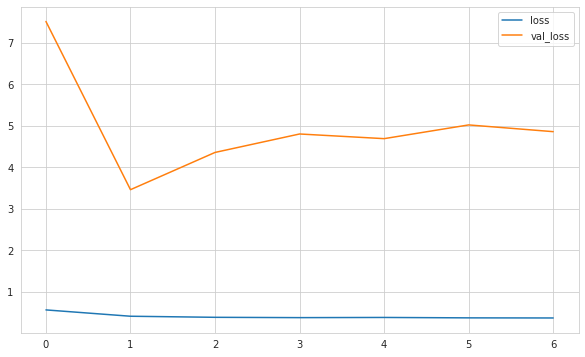

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [98]:
y_train= y_train.to_numpy()



In [109]:
predictions_scaled = []

first_eval_batch = y_train[-length:]
current_batch = first_eval_batch.reshape(y_train.shape)

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:, :], [current_pred], axis=1)

ValueError: ignored

In [77]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [78]:
current_batch 

array([[[ 1.51550453, -0.75717887,  1.74664555,  1.8614354 ],
        [ 1.51550453, -0.19801664,  2.09805039,  1.96491609],
        [ 1.51550453,  0.2928394 ,  2.23070188,  2.01709267],
        [ 1.51550453,  0.42087565,  2.4229539 ,  2.15404554],
        [ 1.51550453,  0.69541199,  2.50838174,  2.12606942],
        [ 1.51550453,  0.35943036,  2.47438176,  2.08620328],
        [ 1.51550453,  0.74131939,  2.29929685,  2.05988136],
        [ 1.51550453,  0.77915516,  2.08891666,  2.10324668],
        [ 1.51550453,  0.80538796,  2.33805012,  2.23465596],
        [ 1.51550453,  1.28292581,  2.63718626,  2.32390326],
        [ 1.51550453,  1.41630951,  2.82190225,  2.35470189]]])

In [75]:
 current_pred = model.predict(current_batch)

1/1 [==============================] - 0s 20ms/step


In [76]:
 current_pred

array([[2.17335]], dtype=float32)

In [34]:
dtf_scaled= scaler.transform((dtf.drop("Otomotiv Satis",axis=1)))

In [68]:
forecast = []

first_eval_batch = dtf_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.concatenate(current_batch[:, 1:, :], [current_pred])

1/1 [==============================] - 0s 24ms/step


TypeError: ignored

In [ ]:
forecast = scaler.inverse_transform(forecast)
forecast

In [ ]:
df

In [ ]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

In [ ]:
ax = dtf.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

In [ ]:
ax = dtf.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')